## **MapNode**

If you want to iterate over a list of inputs, but need to feed all iterated outputs afterward as one input (an array) to the next node, you need to use a 'MapNode'. It is quite similar to a normal Node, but it can take a list of inputs and operate over each input separtely, ultimately returning a list of outputs.

This is useful when the node **B** that we want to use accepts only one file. But, if the next node accepts multiple files, you can use a `MapNode` for B.

```python

from nipype import Node, MapNode, Workflow
a = Node(interface=A(), name="a")
b = MapNode(interface=B(), name="b", iterfield=['in_file']) #you create an iterfield
c = Node(interface=C(), name="c")

my_workflow = Workflow(name="my_workflow")
my_workflow.connect([(a,b,[('out_files', 'in_file')]),
                    (b,c,[('out_file', 'in_files')])
                    ])
```

In [1]:
# Demonstration with a simple function interface

from nipype import Function

def square_func(x):
    return x ** 2

square = Function(["x"], ["f_x"], square_func) # ["x"], x is an input, ["f_x"] is an output

In [2]:
square.run(x=2).outputs.f_x

4

What if we wanted to square a list of numbers? We could set an iterable and just split up the workflow in multiple subworkflows. But say we were making a simple workflow that squared a list of numbers and then summed them. The sum node would expect a list, but using an iterable would make a bunch of sum nodes, and each would get one number from the list. The solution here is to use a `MapNode`.

### **`iterfield`**

The `MapNode` has a filed called `iterfield`, which tells it what inputs should be expecting a list.

In [3]:
from nipype import MapNode

square_node = MapNode(square, name="square", iterfield=["x"])

square_node.inputs.x = [0, 1, 2, 3]
res = square_node.run()

190207-03:03:17,694 nipype.workflow INFO:
	 [Node] Setting-up "square" in "/tmp/tmp5vypzbo_/square".
190207-03:03:17,703 nipype.workflow INFO:
	 [Node] Setting-up "_square0" in "/tmp/tmp5vypzbo_/square/mapflow/_square0".
190207-03:03:17,706 nipype.workflow INFO:
	 [Node] Running "_square0" ("nipype.interfaces.utility.wrappers.Function")
190207-03:03:17,713 nipype.workflow INFO:
	 [Node] Finished "_square0".
190207-03:03:17,716 nipype.workflow INFO:
	 [Node] Setting-up "_square1" in "/tmp/tmp5vypzbo_/square/mapflow/_square1".
190207-03:03:17,721 nipype.workflow INFO:
	 [Node] Running "_square1" ("nipype.interfaces.utility.wrappers.Function")
190207-03:03:17,728 nipype.workflow INFO:
	 [Node] Finished "_square1".
190207-03:03:17,732 nipype.workflow INFO:
	 [Node] Setting-up "_square2" in "/tmp/tmp5vypzbo_/square/mapflow/_square2".
190207-03:03:17,736 nipype.workflow INFO:
	 [Node] Running "_square2" ("nipype.interfaces.utility.wrappers.Function")
190207-03:03:17,742 nipype.workflow INFO:

In [4]:
res.outputs.f_x

# iterables 는 iterable 값 하나씩 output을 주고 
# MapNode는 다양한 outputs들을 하나의 리스트로 저장하는듯.

[0, 1, 4, 9]

Because `iterfield` can take a list of names, you can operate over multiple sets of data, as long as they are the same length. The values in each list will be paired; it does not compute a combinatoric product of the lists.

In [5]:
def power_func(x, y):
    return x ** y 

power = Function(["x", "y"], ["f_xy"], power_func)
power_node = MapNode(power, name="power", iterfield=["x", "y"])
power_node.inputs.x = [0, 1, 2, 3]
power_node.inputs.y = [0, 1, 2, 3]
res = power_node.run()

190207-04:10:22,256 nipype.workflow INFO:
	 [Node] Setting-up "power" in "/tmp/tmp3opkai9p/power".
190207-04:10:22,261 nipype.workflow INFO:
	 [Node] Setting-up "_power0" in "/tmp/tmp3opkai9p/power/mapflow/_power0".
190207-04:10:22,265 nipype.workflow INFO:
	 [Node] Running "_power0" ("nipype.interfaces.utility.wrappers.Function")
190207-04:10:22,271 nipype.workflow INFO:
	 [Node] Finished "_power0".
190207-04:10:22,273 nipype.workflow INFO:
	 [Node] Setting-up "_power1" in "/tmp/tmp3opkai9p/power/mapflow/_power1".
190207-04:10:22,276 nipype.workflow INFO:
	 [Node] Running "_power1" ("nipype.interfaces.utility.wrappers.Function")
190207-04:10:22,280 nipype.workflow INFO:
	 [Node] Finished "_power1".
190207-04:10:22,282 nipype.workflow INFO:
	 [Node] Setting-up "_power2" in "/tmp/tmp3opkai9p/power/mapflow/_power2".
190207-04:10:22,286 nipype.workflow INFO:
	 [Node] Running "_power2" ("nipype.interfaces.utility.wrappers.Function")
190207-04:10:22,298 nipype.workflow INFO:
	 [Node] Finish

In [6]:
print(res.outputs.f_xy)

[1, 1, 4, 27]


Not every input needs to be an iterfield.

In [7]:
power_node = MapNode(power, name="power", iterfield=["x"])
power_node.inputs.x = [0, 1, 2, 3]
power_node.inputs.y = 3
res = power_node.run()

190207-04:11:57,212 nipype.workflow INFO:
	 [Node] Setting-up "power" in "/tmp/tmpcxsgx6_0/power".
190207-04:11:57,217 nipype.workflow INFO:
	 [Node] Setting-up "_power0" in "/tmp/tmpcxsgx6_0/power/mapflow/_power0".
190207-04:11:57,221 nipype.workflow INFO:
	 [Node] Running "_power0" ("nipype.interfaces.utility.wrappers.Function")
190207-04:11:57,227 nipype.workflow INFO:
	 [Node] Finished "_power0".
190207-04:11:57,228 nipype.workflow INFO:
	 [Node] Setting-up "_power1" in "/tmp/tmpcxsgx6_0/power/mapflow/_power1".
190207-04:11:57,231 nipype.workflow INFO:
	 [Node] Running "_power1" ("nipype.interfaces.utility.wrappers.Function")
190207-04:11:57,236 nipype.workflow INFO:
	 [Node] Finished "_power1".
190207-04:11:57,238 nipype.workflow INFO:
	 [Node] Setting-up "_power2" in "/tmp/tmpcxsgx6_0/power/mapflow/_power2".
190207-04:11:57,242 nipype.workflow INFO:
	 [Node] Running "_power2" ("nipype.interfaces.utility.wrappers.Function")
190207-04:11:57,248 nipype.workflow INFO:
	 [Node] Finish

In [8]:
print(res.outputs.f_xy)

[0, 1, 8, 27]


As in the case of `iterables`, each underlying `MapNode` execution can happen in **parallel**.

MapNode allows you to iterate over items of nested lists with the "nested=True" parameter. Outputs will preserve the same nested structure as the inputs.

Let's consider we have multiple functional images(A) and each of them should be motioned corrected. But afterward, we want to put them all together into a GLM, i.e. the input for the GLM should be an array of [B1, B2, B3, ...]. Iterables *can't do that*. They would split up the pipeline. Therefore, we need **MapNodes**.

Let's motion correct two functional images. 
* Gunzip, to unzip the files (plural)
* Realign, to do the motion correction

In [10]:
from nipype.algorithms.misc import Gunzip
from nipype.interfaces.spm import Realign
from nipype import Node, MapNode, Workflow

# First, specify a list of files (just add the same images twice)
files = ['/data/ds001534/sub-01/func/sub-01_task-calorieimage_run-03_bold.nii.gz',
         '/data/ds001534/sub-01/func/sub-01_task-calorieimage_run-03_bold.nii.gz']

# Second, create nodes
realign = Node(Realign(register_to_mean=True), ## What does this 'register_to_mean' do?
               name='motion_correction')

# You will get an error with the following command line:
# gunzip = Node(Gunzip(), name='gunzip')

# With a MapNode, it works. Don't forget to include an iterfield!
gunzip = MapNode(Gunzip(), name='gunzip',
                 iterfield=['in_file'])
gunzip.inputs.in_file = files

# Third, create a workflow: connect the nodes and run.
mcflow = Workflow(name='realign_with_spm')
mcflow.connect(gunzip, 'out_file', realign, 'in_files')
mcflow.base_dir = '/output'
mcflow.run('MultiProc', plugin_args={'n_procs': 4}) ## Run in parallel?


190207-04:26:03,543 nipype.workflow INFO:
	 Workflow realign_with_spm settings: ['check', 'execution', 'logging', 'monitoring']
190207-04:26:03,562 nipype.workflow INFO:
	 Running in parallel.
190207-04:26:03,566 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 5.24/5.24, Free processors: 4/4.
190207-04:26:05,571 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 5.24/5.24, Free processors: 4/4.
190207-04:26:05,633 nipype.workflow INFO:
	 [Node] Setting-up "_gunzip0" in "/output/realign_with_spm/gunzip/mapflow/_gunzip0".190207-04:26:05,638 nipype.workflow INFO:
	 [Node] Setting-up "_gunzip1" in "/output/realign_with_spm/gunzip/mapflow/_gunzip1".

190207-04:26:05,670 nipype.workflow INFO:
	 [Node] Running "_gunzip0" ("nipype.algorithms.misc.Gunzip")190207-04:26:05,673 nipype.workflow INFO:
	 [Node] Running "_gunzip1" ("nipype.algorithms.misc.Gunzip")

190207-04:26:07,574 nipype.workflow INFO:
	 [MultiProc] Run

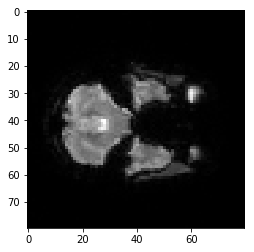

In [23]:
import nibabel as nib
import matplotlib.pyplot as plt

img = nib.load('/output/realign_with_spm/motion_correction/sub-01_task-calorieimage_run-03_bold.nii')
img_data = img.get_data()

img1 = img_data[..., 70]

plt.imshow(img1[..., 4], cmap='gray')

### **Exercise 1**

Create a workflow to calculate a sum of factorials of numbers from a range between nmin and nmax.
(If nmin is 0 and nmax is 3, than 1 + 1 + 2 + 6 = 10)

Use `Node` for a function that creates a list of integers and a function that sums everything at the end. Use `MapNode` to calculate factorials.

In [36]:
from nipype import Workflow, Node, MapNode, Function
import os

def range_fun(n_min, n_max):
    return list(range(n_min, n_max+1)) #+1 꼭!

def factorials(x):
    import math
    return math.factorial(x)

"""def sum(y):
    y = list()
    count = 0
    for i in y:
        count += i 
    return count"""

def summing(terms):
    return sum(terms)

# Define our workflow
wf_ex1 = Workflow('ex1')
wf_ex1.base_dir = os.getcwd()

# Error: range_node = Function(["n_min", "n_max"], ["range_list"], range_fun), name='range_list')
## Function interface랑 function node의 차이?

range_node = Node(Function(input_names=['n_min', 'n_max'], 
                           output_names=['range_list'], 
                           function=range_fun), 
                  name='range_list')

fac_interface = Function(["x"], ["fact_out"], factorials)
fac_node = MapNode(fac_interface, name="factorial_list", iterfield=['x'])
sum_node = Node(Function(["terms"], ["sum_out"], summing), name="summing")

# INPUT n_min and n_max into the range_node!
range_node.inputs.n_min = 0
range_node.inputs.n_max = 3

# Connect the node
wf_ex1.add_nodes([range_node]) 
wf_ex1.connect(range_node, 'range_list', fac_node, 'x')                                                                                                                                                 
wf_ex1.connect(fac_node, 'fact_out', sum_node, 'terms')

eg = wf_ex1.run()

190207-05:19:54,648 nipype.workflow INFO:
	 Workflow ex1 settings: ['check', 'execution', 'logging', 'monitoring']
190207-05:19:54,675 nipype.workflow INFO:
	 Running serially.
190207-05:19:54,676 nipype.workflow INFO:
	 [Node] Setting-up "ex1.range_list" in "/home/neuro/nipype_tutorial/Practices/Basics/ex1/range_list".
190207-05:19:54,682 nipype.workflow INFO:
	 [Node] Outdated cache found for "ex1.range_list".
190207-05:19:54,701 nipype.workflow INFO:
	 [Node] Running "range_list" ("nipype.interfaces.utility.wrappers.Function")
190207-05:19:54,721 nipype.workflow INFO:
	 [Node] Finished "ex1.range_list".
190207-05:19:54,722 nipype.workflow INFO:
	 [Node] Setting-up "ex1.factorial_list" in "/home/neuro/nipype_tutorial/Practices/Basics/ex1/factorial_list".
190207-05:19:54,733 nipype.workflow INFO:
	 [Node] Outdated cache found for "ex1.factorial_list".
190207-05:19:54,751 nipype.workflow INFO:
	 [Node] Setting-up "_factorial_list0" in "/home/neuro/nipype_tutorial/Practices/Basics/ex1/f

In [37]:
eg.nodes()

NodeView((ex1.range_list, ex1.factorial_list, ex1.summing))

In [38]:
list(eg.nodes())[2].result.outputs #the second node      


sum_out = 10

In [39]:
print(list(eg.nodes())[0].result.outputs)
print(list(eg.nodes())[1].result.outputs)


range_list = [0, 1, 2, 3]

Bunch(fact_out=[1, 1, 2, 6])
